In [4]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import matplotlib.pyplot as plt


def load_data():
    return pd.read_csv("Dataset/loan-train.csv"), pd.read_csv("Dataset/loan-test.csv")

def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [5]:
trainData, testData = load_data()

In [6]:
trainData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:

#Calculating means
for i in trainData.columns:
    print(f"The mean of {i}: {round(pd.to_numeric(trainData[i], errors='coerce').mean(),2)}")

The mean of Loan_ID: nan
The mean of Gender: nan
The mean of Married: nan
The mean of Dependents: 0.55
The mean of Education: nan
The mean of Self_Employed: nan
The mean of ApplicantIncome: 5403.46
The mean of CoapplicantIncome: 1621.25
The mean of LoanAmount: 146.41
The mean of Loan_Amount_Term: 342.0
The mean of Credit_History: 0.84
The mean of Property_Area: nan
The mean of Loan_Status: nan


In [9]:
for featureName in trainData.columns:
    if trainData[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(trainData, str(featureName))


"Loan_ID's" Values with count are :
LP001194    1
LP002877    1
LP001744    1
LP001431    1
LP001708    1
           ..
LP002263    1
LP001814    1
LP002328    1
LP001264    1
LP001327    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [10]:
# Checking for Null values in the data set
trainData.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Cleaning the data

In [11]:
# CLEANING DATA
# Fix up some of the data to be of the correct decimal place
# First fix the loan amount in thousands
trainData['LoanAmount'] = trainData['LoanAmount'] * 1000
# Replace the NAN values in each column
trainData['Gender'] = trainData['Gender'].fillna('Not Specified')
trainData['Married'] = trainData['Married'].fillna('Not Specified')
trainData['Dependents'] = trainData['Dependents'].fillna(0)
trainData['Self_Employed'] = trainData['Self_Employed'].fillna('No')
trainData['LoanAmount'] = trainData['LoanAmount'].fillna(0)
trainData['Loan_Amount_Term'] = trainData['Loan_Amount_Term'].fillna('Not Specified')
trainData['Credit_History'] = trainData['Credit_History'].fillna(-1)
trainData.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [12]:
# CLEANING DATA
# Fix up some of the data to be of the correct decimal place
# First fix the loan amount in thousands
testData['LoanAmount'] = testData['LoanAmount'] * 1000
# Replace the NAN values in each column
testData['Gender'] = testData['Gender'].fillna('Not Specified')
testData['Married'] = testData['Married'].fillna('Not Specified')
testData['Dependents'] = testData['Dependents'].fillna(0)
testData['Self_Employed'] = testData['Self_Employed'].fillna('No')
testData['LoanAmount'] = testData['LoanAmount'].fillna(0)
testData['Loan_Amount_Term'] = testData['Loan_Amount_Term'].fillna('Not Specified')
testData['Credit_History'] = testData['Credit_History'].fillna(-1)
testData.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110000.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126000.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208000.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100000.0,360.0,-1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78000.0,360.0,1.0,Urban


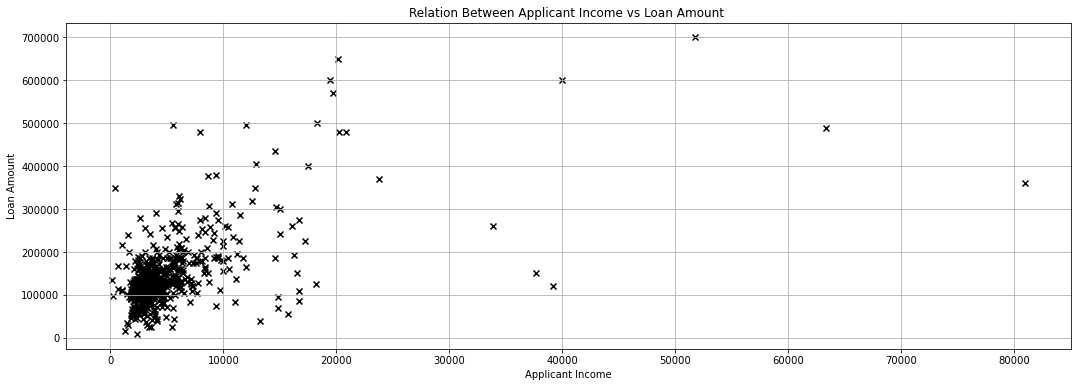

In [13]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(trainData['ApplicantIncome'].loc[(trainData['LoanAmount'] != 0)] , trainData['LoanAmount'].loc[(trainData['LoanAmount'] != 0)], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [14]:
trainData.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158000.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168000.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,360.0,1.0,Semiurban,N


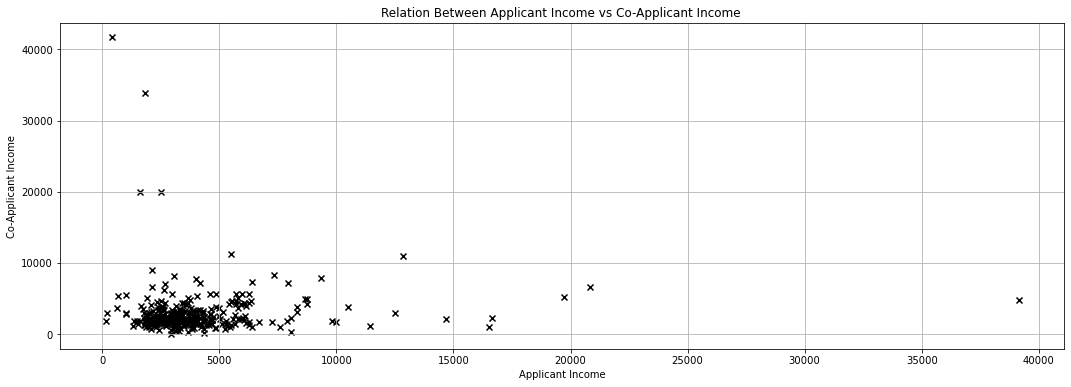

In [15]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Co-Applicant Income ")

plt.grid()
plt.scatter(trainData['ApplicantIncome'].loc[(trainData['CoapplicantIncome'] != 0)] , trainData['CoapplicantIncome'].loc[(trainData['CoapplicantIncome'] != 0)], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Co-Applicant Income")
plt.show()

## Does education mean higher income?

In [16]:
grad = trainData[['ApplicantIncome', 'Education']][(trainData['Education'] == 'Graduate') & (trainData['ApplicantIncome']<20000)]
notgrad = trainData[['ApplicantIncome', 'Education']][(trainData['Education'] == 'Not Graduate') & (trainData['ApplicantIncome']<20000)]

print(f"The mean income of graduated people is {grad.mean()}")
print(f"The mean income of non-graduated people is {notgrad.mean()}")

print(grad.head())
print(notgrad.head())


#graph=pd.DataFrame((grad,notgrad))
graph = pd.concat([grad, notgrad], axis=1)
graph.head()

The mean income of graduated people is ApplicantIncome    5040.715812
dtype: float64
The mean income of non-graduated people is ApplicantIncome    3777.283582
dtype: float64
   ApplicantIncome Education
0             5849  Graduate
1             4583  Graduate
2             3000  Graduate
4             6000  Graduate
5             5417  Graduate
    ApplicantIncome     Education
3              2583  Not Graduate
6              2333  Not Graduate
16             3596  Not Graduate
18             4887  Not Graduate
20             7660  Not Graduate


,ApplicantIncome,Education,ApplicantIncome,Education
0,5849.0,Graduate,NaN,NaN
1,4583.0,Graduate,NaN,NaN
2,3000.0,Graduate,NaN,NaN
3,NaN,NaN,2583.0,Not Graduate
4,6000.0,Graduate,NaN,NaN


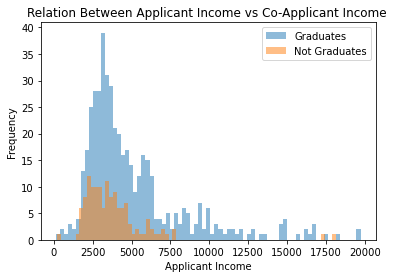

In [17]:
plt.hist(grad['ApplicantIncome'], bins=75, alpha=0.5, label='Graduates')
plt.hist(notgrad['ApplicantIncome'], bins=75, alpha=0.5, label='Not Graduates')
plt.legend(loc='upper right')
plt.title("Relation Between Applicant Income vs Co-Applicant Income ")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

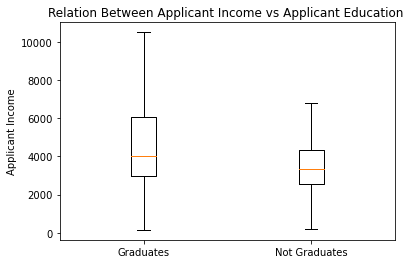

In [18]:
gradplt = trainData['ApplicantIncome'][trainData['Education'] == 'Graduate']
notgradplt = trainData['ApplicantIncome'][trainData['Education'] == 'Not Graduate']
plt.boxplot((gradplt, notgradplt), showfliers=False)
plt.ylabel("Applicant Income")
plt.title("Relation Between Applicant Income vs Applicant Education ")
plt.xticks([1,2],["Graduates",'Not Graduates'])
plt.show()

## Do people who graduated have richer connections'

In [19]:
grads = trainData['CoapplicantIncome'].loc[((trainData['Education'] == 'Graduate') & (trainData['CoapplicantIncome'] != 0))]
notgrads = trainData['CoapplicantIncome'].loc[((trainData['Education'] == 'Not Graduate') & (trainData['CoapplicantIncome'] != 0))]

print(f"The mean income of graduated people is {grads.mean()}")
print(f"The mean income of non-graduated people is {notgrads.mean()}")

The mean income of graduated people is 3182.964942041081
The mean income of non-graduated people is 2086.060975609756


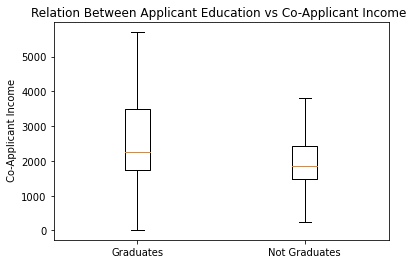

In [20]:
plt.boxplot((grads,notgrads), showfliers=False)
plt.ylabel(" Co-Applicant Income")
plt.title("Relation Between Applicant Education vs Co-Applicant Income ")
plt.xticks([1,2],["Graduates",'Not Graduates'])
plt.show()

## Does geographic location mean higher income?

In [21]:
Urban = trainData['ApplicantIncome'].loc[(trainData['Property_Area'] == 'Urban')]
SemiUrban = trainData['ApplicantIncome'].loc[(trainData['Property_Area'] == 'Semiurban')]
Rural = trainData['ApplicantIncome'].loc[(trainData['Property_Area'] == 'Rural')]

print(f"The mean income of people in Urban areas is {Urban.mean()}")
print(f"The mean income of people in Semi-Urban areas is {SemiUrban.mean()}")
print(f"The mean income of people in Rural areas is {Rural.mean()}")

The mean income of people in Urban areas is 5398.247524752475
The mean income of people in Semi-Urban areas is 5292.261802575107
The mean income of people in Rural areas is 5554.083798882682


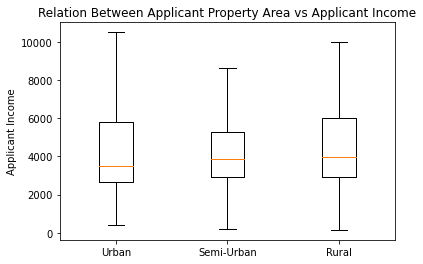

In [22]:
plt.boxplot((Urban,SemiUrban,Rural), showfliers=False)
plt.ylabel("Applicant Income")
plt.title("Relation Between Applicant Property Area vs Applicant Income")
plt.xticks([1,2,3],["Urban",'Semi-Urban','Rural'])
plt.show()

## Can you make a model to guess loan acceptance? Can prediction models help?

We will look into this more as this is our over arching research question. Look out for another jupyter notebook with that!

## Do certain geographic locations have higher rates of loan acceptance?

In [23]:
Urban = trainData['Loan_Status'].loc[(trainData['Property_Area'] == 'Urban')]
SemiUrban = trainData['Loan_Status'].loc[(trainData['Property_Area'] == 'Semiurban')]
Rural = trainData['Loan_Status'].loc[(trainData['Property_Area'] == 'Rural')]

UrbanYes = (Urban.values == 'Y').sum()
SemiUrbanYes = (SemiUrban.values == 'Y').sum()
RuralYes = (Rural.values == 'Y').sum()

print(f'The acceptance rate for loans for people in a Urban area is {UrbanYes/Urban.count()}')
print(f'The acceptance rate for loans for people in a Semi-Urban area is {SemiUrbanYes/SemiUrban.count()}')
print(f'The acceptance rate for loans for people in a Rural area is {RuralYes/Rural.count()}')

The acceptance rate for loans for people in a Urban area is 0.6584158415841584
The acceptance rate for loans for people in a Semi-Urban area is 0.7682403433476395
The acceptance rate for loans for people in a Rural area is 0.6145251396648045


## What is the difference in being considered risk/non-risk as it relates to being married/single?

In [24]:
Single = trainData['Loan_Status'].loc[(trainData['Married'] == 'No')]
Married = trainData['Loan_Status'].loc[(trainData['Married'] == 'Yes')]

SignleYes = (Single.values == 'Y').sum()
MarriedYes = (Married.values == 'Y').sum()

print(f'The acceptance rate of people that are signle is {SignleYes/Single.count()}')
print(f'The acceptance rate of people that are married is {MarriedYes/Married.count()}')

The acceptance rate of people that are signle is 0.6291079812206573
The acceptance rate of people that are married is 0.7160804020100503


## Does marital status have an affect your living situation?

In [25]:
Single = trainData[['Married','Property_Area']].loc[(trainData['Married'] == 'No')]
Married = trainData[['Married','Property_Area']].loc[(trainData['Married'] == 'Yes')]
U = Single.count()
U
# plt.bar(Single['Married'], Single['Property_Area'])
# Single.pivot(index=Single['Married'], columns=Single['Property_Area'], values=Single['Property_Area'])

Married          213
Property_Area    213
dtype: int64

In [26]:
trainData.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158000.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168000.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,360.0,1.0,Semiurban,N


# Start Machine Learning and modeling

### References:

https://d1wqtxts1xzle7.cloudfront.net/47121285/O1803017981-with-cover-page-v2.pdf?Expires=1635974243&Signature=MJQ3pmH1~ve6S4rz~XjY5ZZa44ldhyNVm1Z-F0aicXG7arDRhi4JnoOdDzNn8EczIY5qyP8JqgYFn2-Pmu6yizVPn7EblMY76nWHnJhzSMWh736w3T2k4SDWdaGbWwsAIOy--N~yby~H3OMMFBCpl8he7Mce7rZmu6Ziak3t3YSFg69TmNCCSZyY1gZwmwrjs6QrFaZV2l5oltbVyzaAwRhApaz7KAr3yW5a1hoWrsKnZlRyg~fE2rgB7e0Nu6x7-EyIi9JjqcMq959ONV~QFhLZi76qmqRObz-MIb8E0OhGnYU93l6x1qG9vvmiMG95Zs3LQifL9kUGNEv3LMwbHA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

In [27]:
#Scikit-learn doess pretty much everyhting for free for us to we will be using that
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [28]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [29]:
print(neigh.predict([[1.1]]))

[0]


In [30]:
print(neigh.predict_proba([[0.9]]))

[[0.66666667 0.33333333]]


# Our dataset KNN

In [31]:
trainData['Gender'] = trainData['Gender'].fillna('Not Specified')
trainData['Married'] = trainData['Married'].fillna('Not Specified')
trainData['Dependents'] = trainData['Dependents'].fillna(0)
trainData['Self_Employed'] = trainData['Self_Employed'].fillna('No')
trainData['LoanAmount'] = trainData['LoanAmount'].fillna(0)
trainData['Loan_Amount_Term'] = trainData['Loan_Amount_Term'].fillna(0)
trainData.loc[trainData['Loan_Amount_Term'] == 'Not Specified', 'Loan_Amount_Term'] = 0
trainData['Credit_History'] = trainData['Credit_History'].fillna(0)
trainData.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158000.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168000.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,360.0,1.0,Semiurban,N


In [32]:
# CURRENTLY USING TRAIN DATA SINCE TEST DATA IS MISSING Y VALUES!!!!!!!!!

# For now use just the quantitative data
# ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
XTrain = trainData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
YTrain = trainData[['Loan_Status']]
# Change the Y values from N : Y to 0 : 1
YTrain.loc[YTrain['Loan_Status'] == 'N', 'Loan_Status'] = 0
YTrain.loc[YTrain['Loan_Status'] == 'Y', 'Loan_Status'] = 1
# Split the data 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(XTrain.values, YTrain.values.ravel(), test_size=.3)
Y_train = Y_train.astype('int')

/mnt/linuxlab/home/gdawson1/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/mnt/linuxlab/home/gdawson1/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [33]:
# Compute the linear regression
KNNC = KNeighborsClassifier(n_neighbors=3)
KNNC = KNNC.fit(X_train, Y_train)

In [34]:
print('Fold = 3')
print(f'Cross Validation Score: {cross_val_score(KNNC, X_train, Y_train, cv=3, scoring="accuracy")}')
print('Fold = 5')
print(f'Cross Validation Score: {cross_val_score(KNNC, X_train, Y_train, cv=5, scoring="accuracy")}')
print('Fold = 7')
print(f'Cross Validation Score: {cross_val_score(KNNC, X_train, Y_train, cv=7, scoring="accuracy")}')

Fold = 3
Cross Validation Score: [0.60839161 0.62237762 0.60839161]
Fold = 5
Cross Validation Score: [0.59302326 0.56976744 0.61627907 0.60465116 0.58823529]
Fold = 7
Cross Validation Score: [0.64516129 0.46774194 0.67213115 0.63934426 0.62295082 0.59016393
 0.59016393]


In [35]:
print('Fold = 3')
Y_train_pred_cross_val = cross_val_predict(KNNC, X_train, Y_train, cv=3)
print(f'Confusion Matrix:\n {confusion_matrix(Y_train, Y_train_pred_cross_val)}')
print('Fold = 5')
Y_train_pred_cross_val = cross_val_predict(KNNC, X_train, Y_train, cv=5)
print(f'Confusion Matrix:\n {confusion_matrix(Y_train, Y_train_pred_cross_val)}')
print('Fold = 7')
Y_train_pred_cross_val = cross_val_predict(KNNC, X_train, Y_train, cv=7)
print(f'Confusion Matrix:\n {confusion_matrix(Y_train, Y_train_pred_cross_val)}')

Fold = 3
Confusion Matrix:
 [[ 38  95]
 [ 71 225]]
Fold = 5
Confusion Matrix:
 [[ 27 106]
 [ 68 228]]
Fold = 7
Confusion Matrix:
 [[ 27 106]
 [ 64 232]]


In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(14,10))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(['Precision', 'Recall'], fontsize=20)
    plt.title('Precision and Recall vs the Decision Threshold', fontsize=25)
    plt.xlabel('Threshold', fontsize=20)
    plt.ylabel('Percentage', fontsize=20)
    plt.show()

#### Look here KNN does not have the method="decision_function" that we would need and mentioned in the Hands-On ML

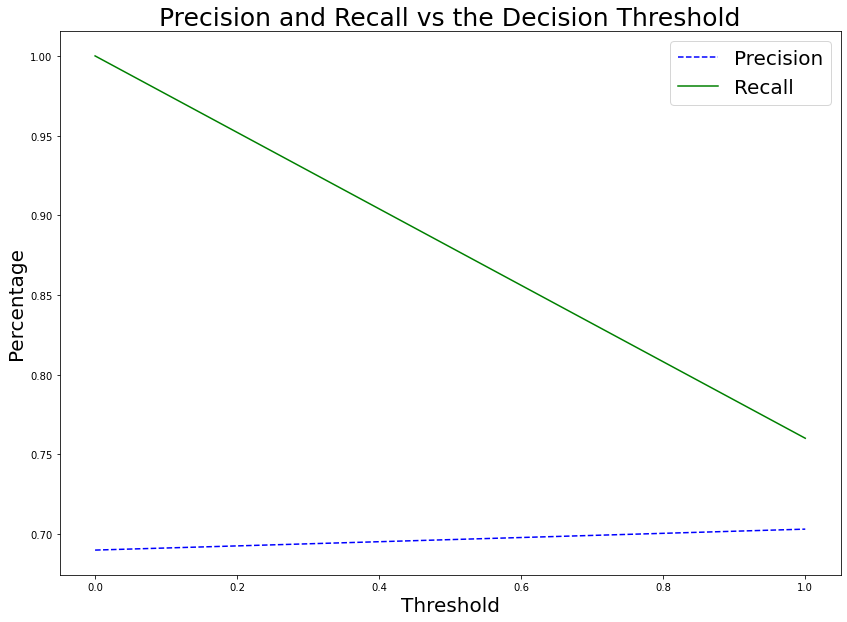

[0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0
 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0]


In [43]:
Y_scores = cross_val_predict(KNNC, X_train, Y_train, cv=3)#method="decision_function"
precisions, recalls, thresholds = precision_recall_curve(Y_train, Y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# Get the predictor
# Y_pred_KNNC = KNNC.predict(X_test)
# # Print the reports
# print(Y_pred_KNNC)
# print(f'Accuracy Score: {accuracy_score(Y_test, Y_pred_KNNC)}')

In [69]:
"""
If we used numpy arrays we could do 
sum(Y_pred_KNNC == Y_test)
"""
for k in range(1, 2):#Trying diffrent k's for KNN this will be the numbe of lines in plot
    X_val = []
    for i in range(0, len(X_test)):#Accuracy for i number of n's 
        Y_pred_KNNC = KNNC.predict(X_test[i:i+1])
        print(sum([1 if x == y else 0 for x in Y_pred_KNNC for y in Y_test[0:i+1]]))
        print([1 if x == y else 0 for x in Y_pred_KNNC for y in Y_test[0:i+1]])
        print(i+1)
        X_val.append(sum([1 if x == y else 0 for x in Y_pred_KNNC for y in Y_test[0:i+1]])/(i+1))
        
print(X_val)        

0
[0]
1
1
[0, 1]
2
1
[0, 1, 0]
3
1
[0, 1, 0, 0]
4
2
[0, 1, 0, 0, 1]
5
3
[0, 1, 0, 0, 1, 1]
6
3
[0, 1, 0, 0, 1, 1, 0]
7
5
[1, 0, 1, 1, 0, 0, 1, 1]
8
4
[0, 1, 0, 0, 1, 1, 0, 0, 1]
9
5
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1]
10
5
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]
11
6
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]
12
7
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]
13
6
[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
14
9
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
15
10
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
16
11
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
17
11
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]
18
12
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
19
13
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
20
14
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
21
14
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
22
15
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]
23
15
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1

97
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
138
98
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]
139
99
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,